In [227]:
from helpers import get_samples
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import helpers
from importlib import reload
from collections import Counter
reload(helpers);

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
df = get_samples(num_samples=5000, random=True)

In [87]:
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
7,2020-01-17-000357,[ The delay ] will have an impact [ on Slough ...,Dexter Smith,[Q5268447],2020-01-17 13:03:00,1,"[[Dexter Smith, 0.924], [None, 0.076]]",[http://www.sloughexpress.co.uk/gallery/slough...,E
21,2020-02-03-000717,"50-YEAR-OLD J-LO, 43-YEAR-OLD SHAKIRA STAR IN ...",None,[],2020-02-03 16:51:49,1,"[[None, 0.6264], [Jennifer Lopez, 0.1782], [Je...",[http://sfgate.com/entertainment/article/Let-s...,E
39,2020-01-10-001487,"A lot of material, it may have been embarrassi...",None,[],2020-01-10 15:47:06,1,"[[None, 0.486], [Charles Glasser, 0.4744], [Ja...",[https://www.lifenews.com/2020/01/10/we-must-h...,E
44,2020-04-11-000477,a manufacturer here in the state of California.,Gavin Newsom,[Q461391],2020-04-11 16:05:27,1,"[[Gavin Newsom, 0.7559], [None, 0.1312], [Rach...",[http://news.vice.com/en_us/article/qjdqnb/tru...,E
49,2020-03-09-001207,A patriotic note is struck when an elephant pr...,Richard Manning,"[Q15454301, Q52663839, Q56721763]",2020-03-09 12:00:00,1,"[[Richard Manning, 0.4525], [None, 0.4299], [R...",[http://postandcourier.com/food/spanish-flu-mi...,E
...,...,...,...,...,...,...,...,...,...
49962,2020-03-30-038964,"Over the course of the season, we began to lim...",John Dean,"[Q1630448, Q18022486, Q21228625, Q21461030, Q2...",2020-03-30 00:00:00,3,"[[John Dean, 0.5578], [None, 0.4422]]",[https://www.fortmcmurraytoday.com/sports/loca...,E
49964,2020-02-24-044984,Papag-aralan po natin pag ganyan. Kasi wala ri...,Franz Alvarez,[Q59515481],2020-02-24 06:00:08,1,"[[Franz Alvarez, 0.7197], [None, 0.2803]]",[https://newsinfo.inquirer.net/1232622/can-abs...,E
49969,2020-03-18-051062,People are advised to pray at home. Hence the ...,Shyamal Bose,[Q50345234],2020-03-18 21:09:51,1,"[[Shyamal Bose, 0.798], [None, 0.1932], [Sriji...",[http://www.telegraphindia.com/states/west-ben...,E
49974,2020-02-28-052357,"People just thought I was their best mate,",None,[],2020-02-28 10:00:12,4,"[[None, 0.5818], [Martin Freeman, 0.288], [Joh...",[http://www.nytimes.com/2020/02/28/arts/televi...,E


In [88]:
#### Average length of the text before any preprocess : 

In [89]:
df = df.drop(["qids", "probas", "phase", "quoteID", "urls"], axis=1)
#sns.histplot(data=)

In [90]:
df["quote_len"] = df.quotation.apply(helpers.get_tokens).apply(len)

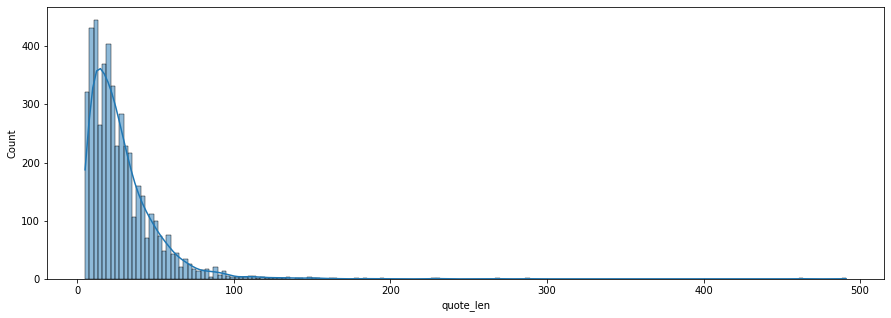

In [91]:
f, a = plt.subplots(figsize=(15, 5))
sns.histplot(data=df, x="quote_len", kde=True);

In [92]:
helpers.CIs(data=df, columns=["quote_len"], funcs=[np.mean, np.std, lambda x : np.percentile(x, 0.5)]).transpose()

,mean_low,mean_computed,mean_high,std_low,std_computed,std_high,<lambda>_low,<lambda>_computed,<lambda>_high
quote_len,27.830818,28.391003,29.121095,21.188133,23.612752,26.448992,5.0,5.0,5.0


In [93]:
from time import time
start = time()

df["prep_quote"] = df.quotation.apply(helpers.preprocess_quote)
print(f"It took : {round(time() - start, 2)} seconds")

It took : 7.52 seconds


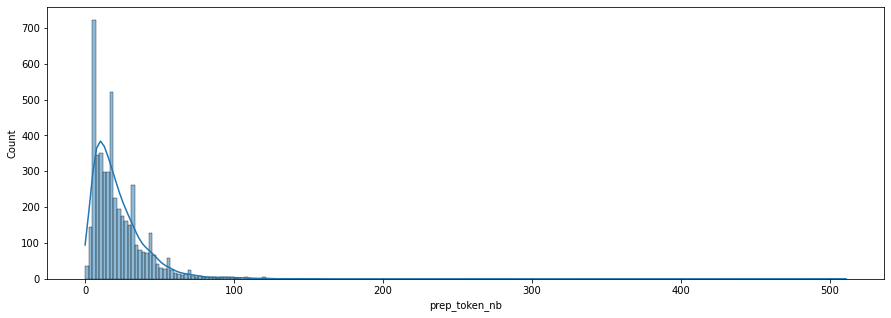

In [94]:
df["prep_token_nb"] = df.prep_quote.apply(len)
f, a = plt.subplots(figsize=(15, 5))
sns.histplot(data=df, x="prep_token_nb", kde=True);

In [95]:
helpers.CIs(data=df, columns=["prep_token_nb"], funcs=[np.mean, np.std, np.median]).transpose()

,mean_low,mean_computed,mean_high,std_low,std_computed,std_high,median_low,median_computed,median_high
prep_token_nb,21.752234,22.348119,22.982704,18.231695,20.732495,23.824741,17.0,17.0,17.0


In [96]:
print(df[df["prep_token_nb"] == df.prep_token_nb.max()]["quotation"].values[0])
print("\n"*3)
print(df[df["prep_token_nb"] == df.prep_token_nb.max()]["prep_quote"].values[0])

March 27, 2020 Letter to Cape Cod Second Homeowners: Cape Cod is home to over 214,000 year-round residents, who appreciate and depend upon our seasonal influx of visitors and second homeowners. It has been our way of life for centuries. During the coronavirus crisis, we all understand the desire to come to your second home on the Cape while sheltering in place. We are asking that if you do so, please help us all to remain safe and healthy by following these actions: Individuals traveling to Cape Cod from off-Cape and out of state are to self-quarantine for 14 days to avoid spreading the virus. Bring items that you will need during your stay, including prescriptions, groceries, cleaning supplies, personal health items and personal protective equipment. While essential service establishments may be open, there are shortages being experienced of key items. Support our restaurants with take-out orders as found on this list https://www.capecodchamber.org / restaurants/restaurants-offering-t

### Word to Vec :

In [97]:
total = []
for prep in df.prep_quote.values:
    total = total + list(prep)

In [98]:
common = Counter(total).most_common(20)

In [99]:
### don't run : really long
### helpers.save_model()

In [100]:
### be careful : tension on RAM
model = helpers.get_model()

In [101]:
model.get_vector(common[0][0]).reshape((1, 300)).shape

(1, 300)

In [102]:
%timeit -n 1 helpers.aggregate(model, df.prep_quote.values[4]) 

The slowest run took 336.03 times longer than the fastest. This could mean that an intermediate result is being cached.
10.7 ms ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [103]:
df[df.prep_token_nb == 0]

,quotation,speaker,date,numOccurrences,quote_len,prep_quote,prep_token_nb
9995,"Why now, 2021? Here's why,",Michael J. Graham,2020-03-02 21:03:20,1,9,[],0
14178,should be out in 2020,Kate Hudson,2020-02-17 00:00:00,5,5,[],0
16443,not having the same face,Angelina Pivarnick,2020-02-05 23:38:27,1,5,[],0
20738,He can take him on.,Ray Newman,2020-02-12 01:06:39,1,6,[],0
49164,"I didn't want that out,",Clayton Kershaw,2020-04-15 12:00:00,6,7,[],0


In [104]:
df = df[df.prep_token_nb != 0]

In [105]:
## Comme dirait Jean Pierre Coff : C DE LA MERDE

X = helpers.get_w2c_matrix(model, df, "prep_quote")

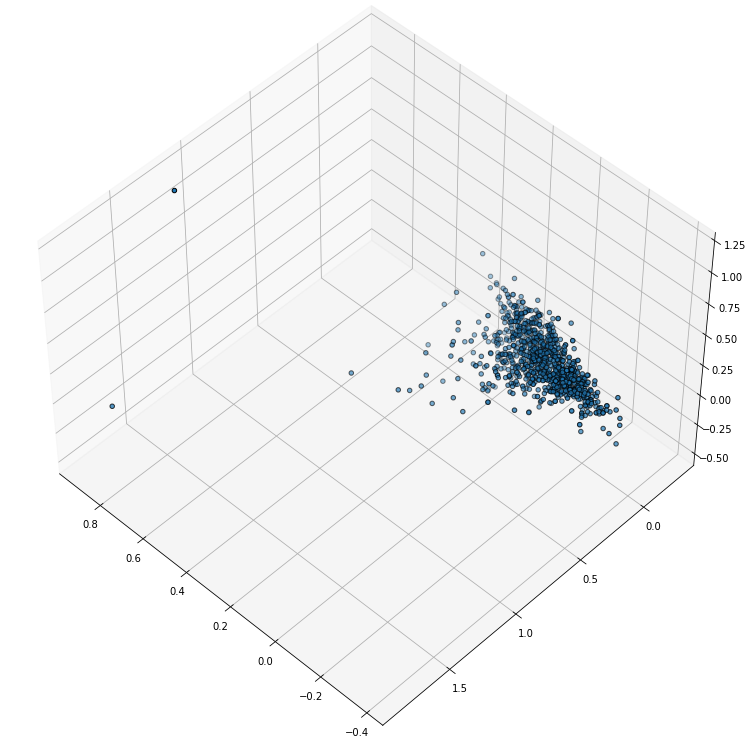

In [106]:
helpers.show_w2v_words(X)

### Discrimanation between years :

In [107]:
df['date'] = pd.to_datetime(df['date'])

In [108]:
split_dates = []
for month_id in range(1, 13):
    split_dates.append(pd.datetime(2020,month_id,1))
split_dates.append(pd.datetime(2021, 1, 1))

<ipython-input-108-1b9000f2df69>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_dates.append(pd.datetime(2020,month_id,1))
<ipython-input-108-1b9000f2df69>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_dates.append(pd.datetime(2021, 1, 1))


### Final Pipeline + Benchmarking :

In [203]:
def benchmark(start, part):
    print(f"It took for 10_000 samples : {round(time() - start, 2)} to {part}")

It took for 10_000 samples : 7.53 to load
It took for 10_000 samples : 36.3 to preprocess
It took for 10_000 samples : 3.66 to get matrices
colors we applied


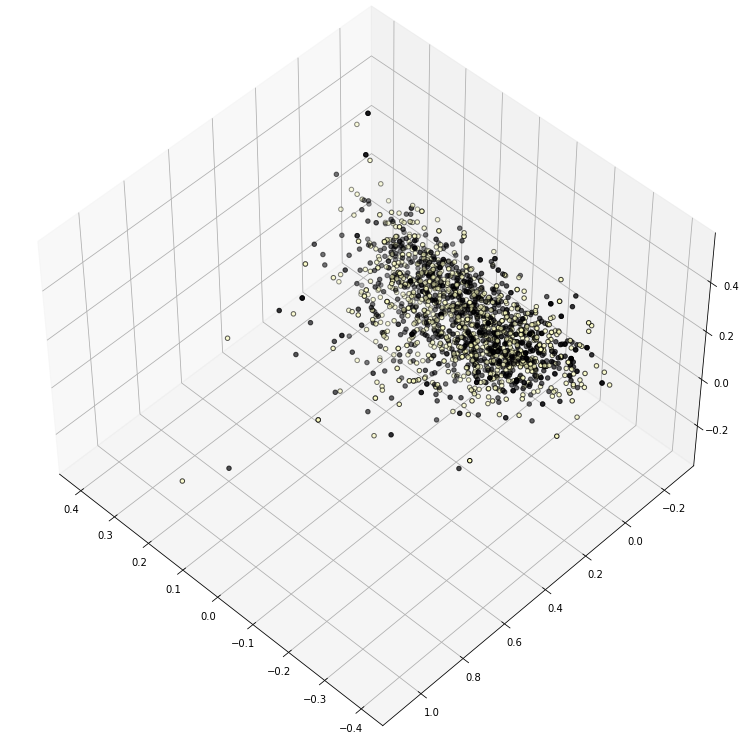

colors we applied


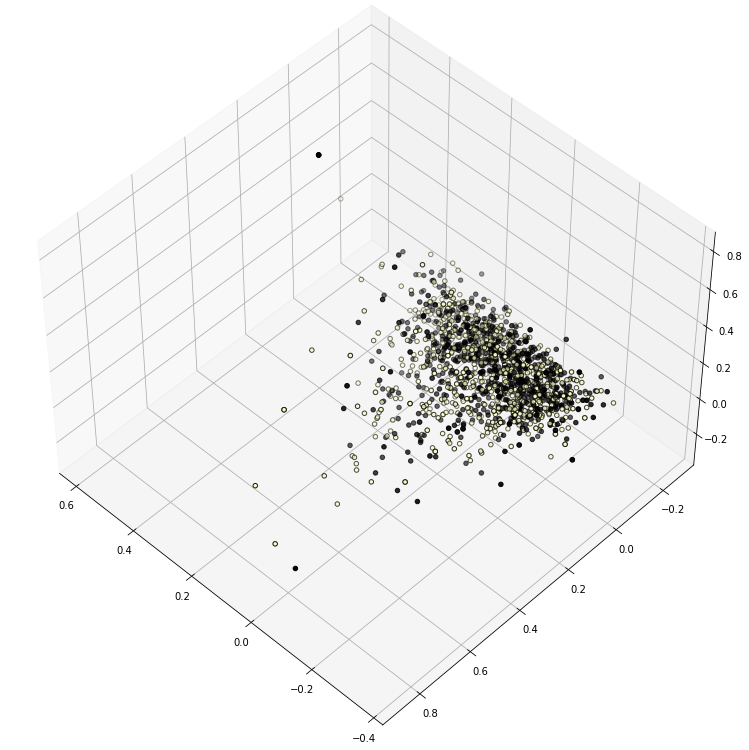

colors we applied


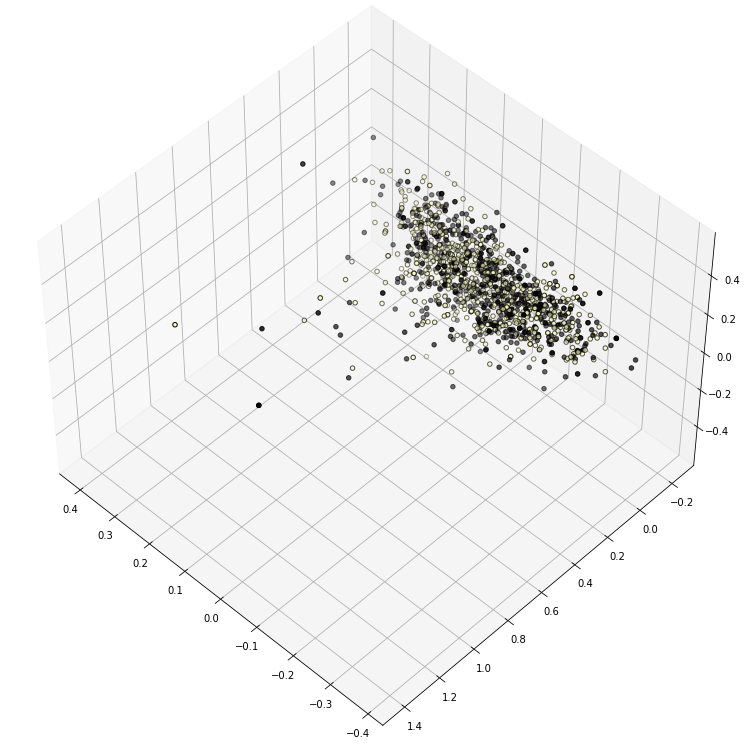

colors we applied


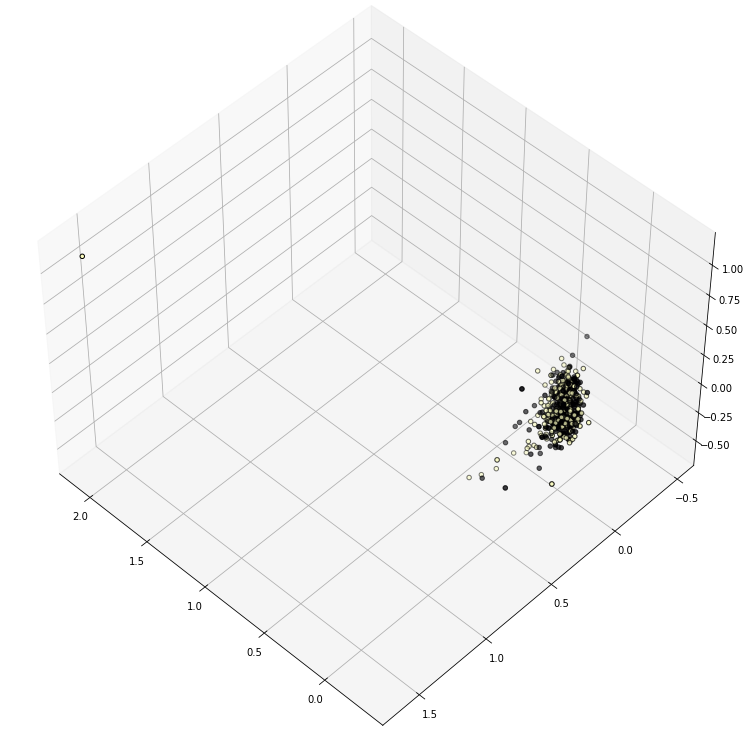

It took for 10_000 samples : 2.3 to plot
It took for 10_000 samples : 49.86 to do everything


In [228]:
start = time()

startr = time()
df = get_samples(num_samples=20_000, random=True)
benchmark(startr, "load")

df = df.drop(["qids", "probas", "phase", "quoteID", "urls"], axis=1) ## get rid of useless cols
df["date"] = pd.to_datetime(df["date"]) ## need date to split it after (need proper typing)

startr = time()
df["prep_quote"] = df.quotation.apply(helpers.preprocess_quote) ## preprocess quotes
benchmark(startr, "preprocess")

## discriminate with the month here :
df["month"] = pd.DatetimeIndex(df["date"]).month

## adds random sentiment
fake_sentiments = np.random.randint(0, 2, len(df.index))
df['sentiment'] = fake_sentiments

startr = time()
## get all the datapoints (one per quote) in W2V vector space
vec_spaces, labels = zip(*df.groupby("month").apply(lambda x : helpers.get_w2c_matrix(model, x, "prep_quote", "sentiment")).values)
benchmark(startr, "get matrices")

## plot them all : 
startr = time()
[helpers.show_w2v_words(vec_space, outfilename=f'W2V{idx}.png', colors=helpers.get_cmap_from_labels(labels[idx])) for idx, vec_space in enumerate(vec_spaces)]
benchmark(startr, "plot")

benchmark(start, "do everything")

In [231]:
helpers.get_cmap_from_labels(labels[0])

array([[1.46200e-03, 4.66000e-04, 1.38660e-02, 1.00000e+00],
       [1.46200e-03, 4.66000e-04, 1.38660e-02, 1.00000e+00],
       [9.87053e-01, 9.91438e-01, 7.49504e-01, 1.00000e+00],
       ...,
       [1.46200e-03, 4.66000e-04, 1.38660e-02, 1.00000e+00],
       [1.46200e-03, 4.66000e-04, 1.38660e-02, 1.00000e+00],
       [1.46200e-03, 4.66000e-04, 1.38660e-02, 1.00000e+00]])

### Evaluate the clusterizations :

colors we applied


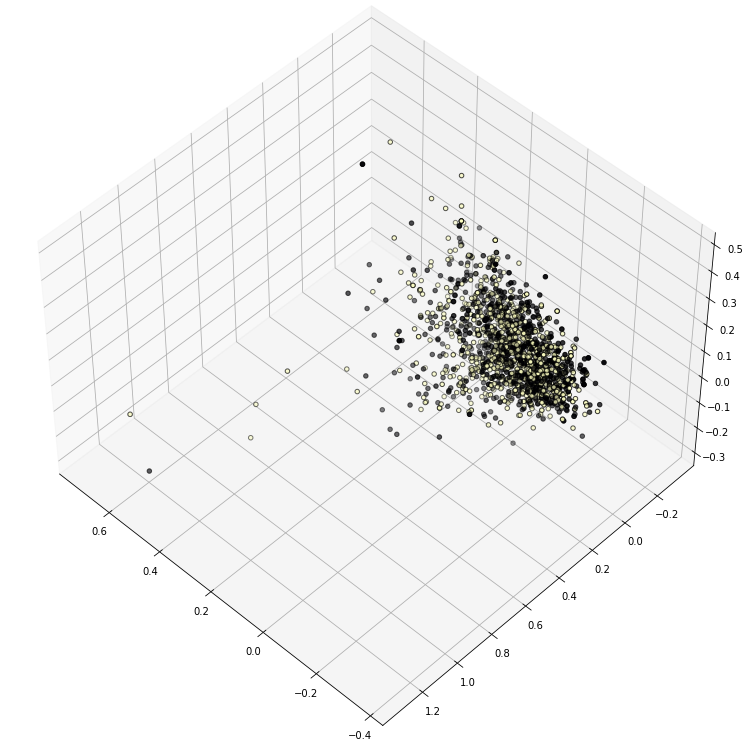

colors we applied


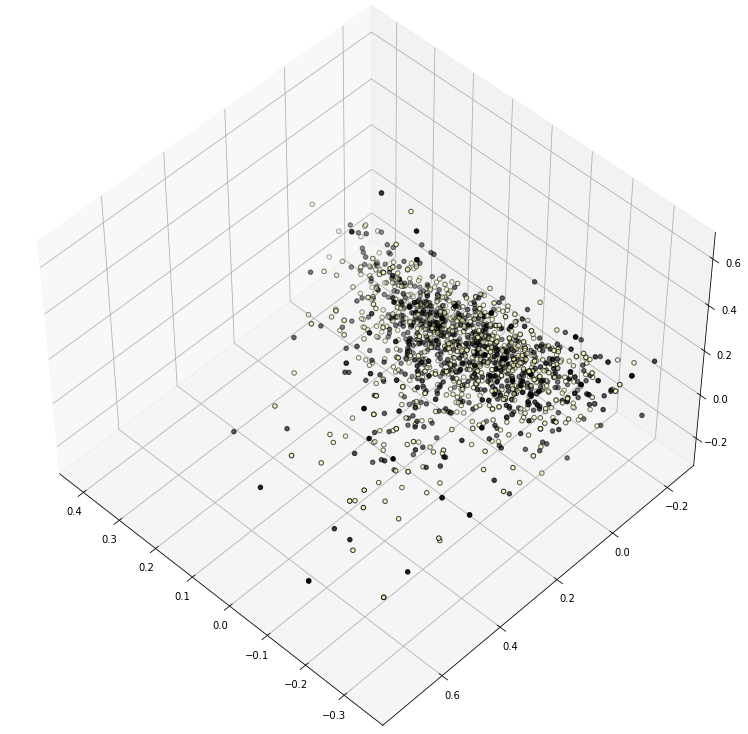

colors we applied


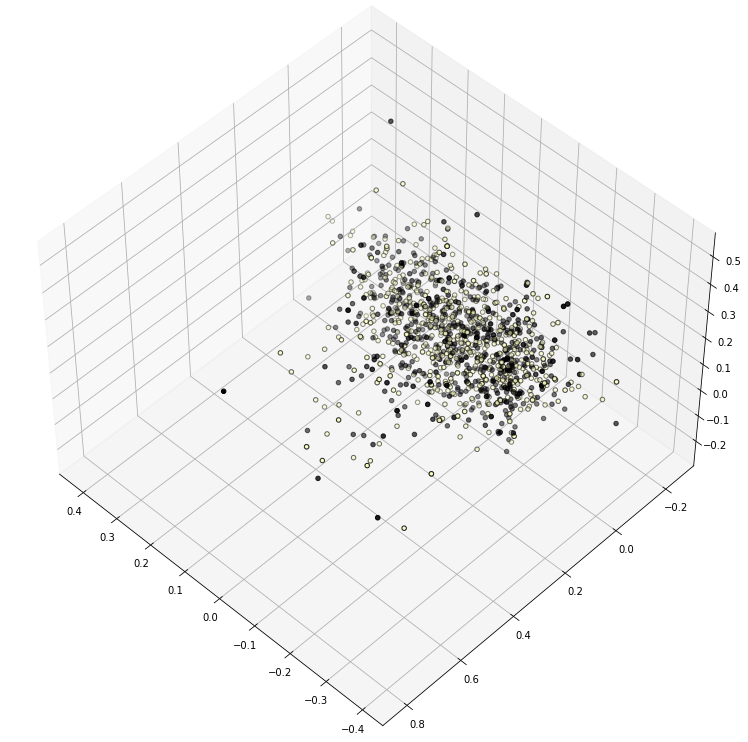

colors we applied


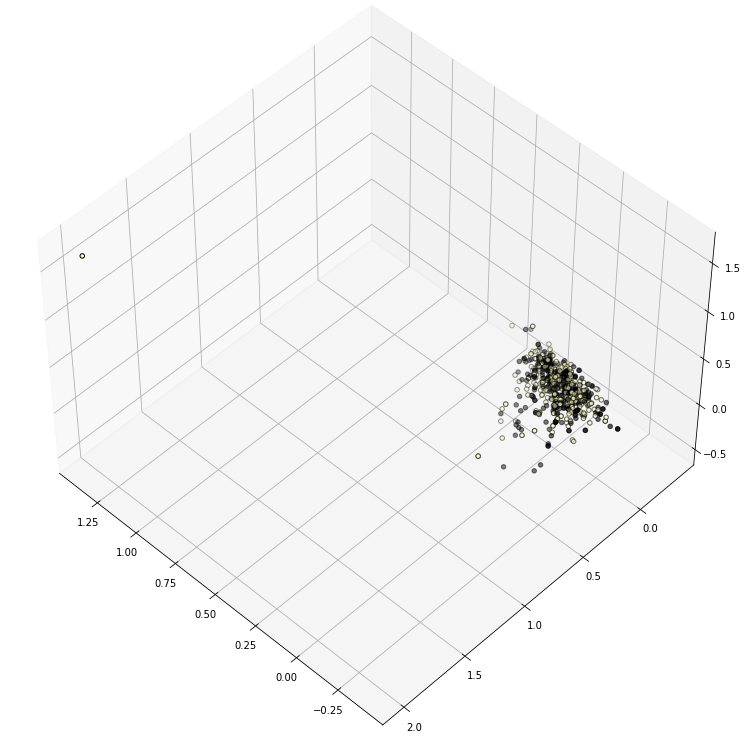

[None, None, None, None]

In [198]:
vec_spaces = df.groupby("month").apply(lambda x : helpers.get_w2c_matrix(model, x, "prep_quote"))
[helpers.show_w2v_words(vec_space, outfilename=f'W2V{idx}.png', colors=helpers.get_color_map(df, "sentiment")) for idx, vec_space in enumerate(vec_spaces)]


In [245]:
reload(helpers);

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [236]:
### we study January
jvec_space = vec_spaces[0]
jlabels = labels[0]
pos_vecs = jvec_space[jlabels == 1]
neg_vecs = jvec_space[jlabels == 0]

cpos = helpers.get_center_of_mass(pos_vecs)
cneg = helpers.get_center_of_mass(neg_vecs)

In [246]:
helpers.normalized_cut(pos_vecs, neg_vecs, helpers.cosine_sim)

C:\Users\antom\Documents\LIFE\EPFL\MA\MA1\ADA\ada-2021-project-adada-sur-mon-bidet\helpers.py:177: RuntimeWarning: invalid value encountered in float_scalars
  return np.sum(center1 * center2) / (np.linalg.norm(center1) * np.linalg.norm(center2))


nan